In [27]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jenkspy as jp
from geopy.geocoders import Nominatim

In [8]:
df = pd.read_csv('massshootings.csv', encoding = 'ISO-8859-1', parse_dates = ['Date'])

In [9]:
df.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [10]:
df.columns

Index(['S#', 'Title', 'Location', 'Date', 'Incident Area',
       'Open/Close Location', 'Target', 'Cause', 'Summary', 'Fatalities',
       'Injured', 'Total victims', 'Policeman Killed', 'Age',
       'Employeed (Y/N)', 'Employed at', 'Mental Health Issues', 'Race',
       'Gender', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
geolocator = Nominatim()

In [12]:
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)
print((location.latitude, location.longitude))

Flatiron Building, 175, 5th Avenue, Flatiron Building, Manhattan Community Board 5, New York County, NYC, New York, 10010, United States of America
(40.7410861, -73.9896298241625)


In [17]:
df.isnull().sum()

S#                        0
Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
dtype: int64

In [18]:
df.loc[96]

S#                                                                     97
Title                                   Clearbrook (Greenwood), Minnesota
Location                                Clearbrook (Greenwood), Minnesota
Date                                                  2015-09-10 00:00:00
Incident Area                                                        Home
Open/Close Location                                                 Close
Target                                                             random
Cause                                                                 NaN
Summary                 Five family members - two adults and three chi...
Fatalities                                                              5
Injured                                                                 0
Total victims                                                           4
Policeman Killed                                                        0
Age                                   

In [46]:
def fill_LatLong(row):
    if (row['Latitude'] != row['Latitude'] or row['Longitude'] != row['Longitude']):
        location = geolocator.geocode(row['Location'])
        row['Latitude'] = location.latitude
        row['Longitude'] = location.longitude
    return row

In [47]:
df.apply(lambda row: fill_LatLong(row), axis = 1)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,29.274044,-98.055906
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,39.957821,-104.966989
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,39.418719,-76.294402
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,46.844325,-71.274327
5,6,Pennsylvania supermarket shooting,"Tunkhannock, PA",2017-06-07,Weis grocery,Close,coworkers,terrorism,"Randy Stair, a 24-year-old worker at Weis groc...",3,...,3,NaN,24,1.0,Weis grocery,Unclear,White,M,41.538516,-75.946844
6,7,Florida awning manufacturer shooting,"Orlando, Florida",2017-06-05,manufacturer Fiamma Inc.,Close,coworkers,unemployement,"John Robert Neumann, Jr., 45, a former employe...",5,...,5,NaN,45,1.0,manufacturer Fiamma Inc.,Unclear,NaN,M,28.542123,-81.379047
7,8,Rural Ohio nursing home shooting,"Kirkersville, Ohio",2017-05-12,a nursing home,Close,coworkers,NaN,"Thomas Hartless, 43, shot and killed a former ...",3,...,3,1.0,43,1.0,some nursing home,Yes,White,M,39.959508,-82.595718
8,9,Fresno downtown shooting,"Fresno, California",2017-04-18,a street in downtown,Open,random,racism,"Kori Ali Muhammad, 39, opened fire along a str...",3,...,3,NaN,39,NaN,NaN,Unclear,Black,M,36.729529,-119.708861
9,10,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",2017-01-06,baggage claim area of the airport,Close,random,terrorism,"Esteban Santiago, 26, flew from Alaska to Fort...",5,...,11,NaN,26,NaN,NaN,Yes,Latino,M,26.122308,-80.143379


In [48]:
df.to_csv('massshootings_2.csv')

In [6]:
df2 = pd.read_csv('../data/usa.csv')

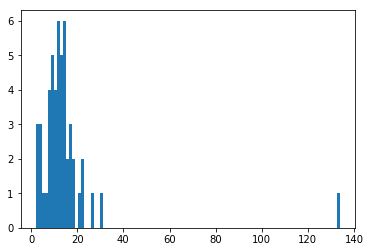

In [23]:
plt.hist(df2['Armes/100 h.'], 100)
plt.show()

In [28]:
jp.jenks_breaks(df2['Armes/100 h.'], 4)

[2.0, 10.0, 19.0, 30.0, 134.0]